In [ ]:
from lxml import html 
import requests
from bs4 import BeautifulSoup
import csv
from datetime import datetime
import requests 
import itertools
import pandas as pd
import numpy as np

In [ ]:


url = 'https://rstudio-pubs-static.s3.amazonaws.com/288508_31e28163c3934a75a8fafb930765377c.html#'
    # Request the page 
# get the contents of the webpage in text format and store in a variable called data
data  = requests.get(url).text
soup = BeautifulSoup(data,"html5lib")
#find all html tables in script  web page
tables = soup.find_all('script') # in html table is represented by the tag <table> da igual el script
len(tables)

17

In [ ]:
for index,table in enumerate(tables):
    #print(table)
    if ('data-pagedtable-source="" type="application/json">' in str(table)):
        table_index = index
        tabel=table
print(table_index)

14


In [ ]:
from pathlib import Path
txt = Path('notasmates.txt').read_text()

In [ ]:
print(type(txt))
# re
# converting json dataset from dictionary to dataframe
data = json.loads(txt)
df = pd.json_normalize(data['columns'])
columns=[]
for i,pos in enumerate(df["label"].values.tolist()):
    if pos[0]!="":
        columns.append(pos[0])
        
columns

<class 'str'>


['Curso02',
 'Seccion03',
 'Carrera04',
 'Facultad05',
 'Fecha06',
 'Ciclo07',
 'Genero10',
 'PrimerParcial11',
 'SegundoParcial13',
 'ExamenFinal15',
 'NotaFinal17']

In [ ]:
# re
# converting json dataset from dictionary to dataframe
columns.append("id")
data = json.loads(txt)
df = pd.json_normalize(data['data'])
df.columns=columns
df

,Curso02,Seccion03,Carrera04,Facultad05,Fecha06,Ciclo07,Genero10,PrimerParcial11,SegundoParcial13,ExamenFinal15,NotaFinal17,id
0,Matematica I,A,IME,FISICC,06/01/2011,2011,1,50,90,88,90,1
1,Matematica I,A,II,FISICC,06/01/2011,2011,2,25,50,0,22,2
2,Matematica I,A,II,FISICC,06/01/2011,2011,1,75,100,0,53,3
3,Matematica I,A,II,FISICC,06/01/2011,2011,1,0,60,0,13,4
4,Matematica I,A,ITR,FISICC,06/01/2011,2011,1,100,100,93,100,5
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Nivelacion Matematica,A,IU,FACTI,06/01/2014,2014,1,72,6,0,37,996
996,Nivelacion Matematica,A,IU,FACTI,06/01/2014,2014,2,48,44,61,65,997
997,Nivelacion Matematica,A,IU,FACTI,06/01/2014,2014,1,80,55,40,68,998
998,Nivelacion Matematica,A,IU,FACTI,06/01/2014,2014,1,78,75,41,64,999


In [ ]:
df.to_csv("notasmates.csv",index=False)

In [ ]:
df = pd.read_csv("notasmates.csv")
print(df["NotaFinal17"].mean())
print(df["ExamenFinal15"].mean())
print(df["PrimerParcial11"].mean(),df["SegundoParcial13"].mean())

51.735
39.231
56.095 51.298


In [ ]:
df = pd.read_csv("notasmates.csv")
df = df.groupby('Curso02').size().reset_index(name='Count').rename(columns={'Curso02':'Curso02'})
df=df.sort_values(by=["Count"],ascending=False)
df.index=range(1,len(df)+1)
df

,Curso02,Count
1,Matematica I,556
2,Nivelacion Matematica,235
3,Matematica 108,200
4,Matematica II,9


In [ ]:

df =df[["Curso02","PrimerParcial11","SegundoParcial13","ExamenFinal15","NotaFinal17"]].groupby(['Curso02'],as_index=False).mean()

df.index=range(1,len(df)+1)
df

,Curso02,PrimerParcial11,SegundoParcial13,ExamenFinal15,NotaFinal17
1,Matematica 108,52.750000,47.855000,35.395000,49.240000
2,Matematica I,54.460432,51.419065,40.919065,52.041367
3,Matematica II,61.555556,55.777778,54.555556,59.555556
4,Nivelacion Matematica,62.600000,53.770213,37.914894,52.834043


In [ ]:
df = pd.read_csv("notasmates.csv")
df = df.groupby('Facultad05').size().reset_index(name='Count').rename(columns={'Facultad05':'Facultad05'})
df=df.sort_values(by=["Count"],ascending=False)
df.index=range(1,len(df)+1)
df

,Facultad05,Count
1,FISICC,565
2,FACTI,435


In [ ]:
df = pd.read_csv("notasmates.csv")
df =df[["Facultad05","PrimerParcial11","SegundoParcial13","ExamenFinal15","NotaFinal17"]].groupby(['Facultad05'],as_index=False).mean()

df.index=range(1,len(df)+1)
df

,Facultad05,PrimerParcial11,SegundoParcial13,ExamenFinal15,NotaFinal17
1,FACTI,58.071264,51.050575,36.756322,51.181609
2,FISICC,54.573451,51.488496,41.136283,52.161062


In [ ]:
df = pd.read_csv("notasmates.csv")
df = df.groupby('Carrera04').size().reset_index(name='Count').rename(columns={'Carrera04':'Carrera04'})
df=df.sort_values(by=["Count"],ascending=False)
df.index=range(1,len(df)+1)
df

,Carrera04,Count
1,IU,309
2,II,234
3,IME,131
4,IAD,126
5,ITR,103
6,IE,50
7,ISE,47


In [ ]:
df = pd.read_csv("notasmates.csv")
df =df[["Carrera04","PrimerParcial11","SegundoParcial13","ExamenFinal15","NotaFinal17"]].groupby(['Carrera04'],as_index=False).mean()

df.index=range(1,len(df)+1)
df

,Carrera04,PrimerParcial11,SegundoParcial13,ExamenFinal15,NotaFinal17
1,IAD,55.547619,50.698413,42.388889,54.484127
2,IE,63.440000,62.380000,56.580000,63.440000
3,II,56.320513,52.106838,38.867521,52.055556
4,IME,52.190840,50.106870,41.770992,50.656489
5,ISE,56.531915,52.276596,44.936170,53.553191
6,ITR,48.436893,46.194175,36.252427,48.203883
7,IU,59.100324,51.194175,34.459547,49.834951


In [ ]:
# grouping results
df = pd.read_csv("notasmates.csv")
df_group_one=df[['Curso02',"Carrera04","Facultad05","PrimerParcial11","SegundoParcial13","ExamenFinal15","NotaFinal17"]]
df_group_one = df_group_one.groupby(['Curso02',"Facultad05","Carrera04"],as_index=False).mean()#hace la media de las categoricas respecto de las numericas
df_group_one#r es solo una prueba

,Curso02,Facultad05,Carrera04,PrimerParcial11,SegundoParcial13,ExamenFinal15,NotaFinal17
0,Matematica 108,FACTI,IAD,49.636364,48.890909,41.600000,53.127273
1,Matematica 108,FACTI,IU,53.931034,47.462069,33.041379,47.765517
2,Matematica I,FISICC,IE,63.440000,62.380000,56.580000,63.440000
3,Matematica I,FISICC,II,56.320513,52.106838,38.867521,52.055556
4,Matematica I,FISICC,IME,52.190840,50.106870,41.770992,50.656489
5,Matematica I,FISICC,ISE,55.342105,51.447368,42.657895,52.131579
6,Matematica I,FISICC,ITR,48.436893,46.194175,36.252427,48.203883
7,Matematica II,FISICC,ISE,61.555556,55.777778,54.555556,59.555556
8,Nivelacion Matematica,FACTI,IAD,60.126761,52.098592,43.000000,55.535211
9,Nivelacion Matematica,FACTI,IU,63.670732,54.493902,35.713415,51.664634


## Probando simulacion de datos

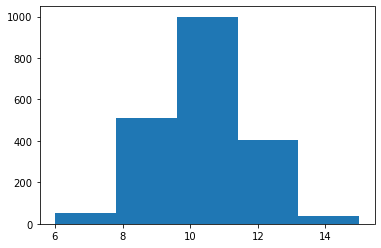

In [ ]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

horas=[]
for _ in range(2000):
    
    horas.append(round((random.gauss(10.35,1.5))))#para los de junio parametros son 7 y 2.8


plt.hist(horas, bins=5)
plt.show() 

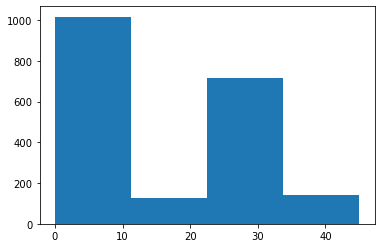

In [ ]:
mins=[0,15,30,45]
min_=[]
for _ in range(2000):
       min_.append(random.choices(mins,weights=[4,0.5,3,0.5],k=1)[0])
plt.hist(min_, bins=4)
plt.show()

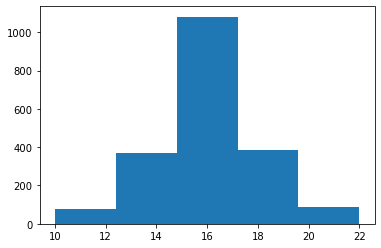

In [ ]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

dias=[]
for _ in range(2000):
    
    dias.append(abs(round((random.gauss(16,2)))))

for i,pos in enumerate(dias):
    if pos==0:
        dias[i]=1
plt.hist(dias, bins=5)
plt.show() 

In [ ]:
mes=[]
año=[]
for _ in range(2000):
    año.append(2021)
    mes.append(5)

In [ ]:
df2 = pd.DataFrame(
    {'año': año,
     'mes': mes,
     'dia': dias,
     'hora': horas,
     'min': min_
    })
df2["dia"]=dias
df2['dateInt']=df2['año'].astype(str) + df2['mes'].astype(str).str.zfill(2)+ df2['dia'].astype(str).str.zfill(2)
df2['Date_start_horario'] = pd.to_datetime(df2['dateInt'], format='%Y%m%d')
df2

,año,mes,dia,hora,min,dateInt,Date_start_horario,Date_start_Examenes,days_left,Lengua,Mates,Ingles,Biologia,Quimica,Historia
0,2021,5,20,9,0,20210520,2021-05-20,2021-06-07,21,7.65,4.91,4.08,6.83,6.18,6.68
1,2021,5,21,10,30,20210521,2021-05-21,2021-06-09,27,4.13,8.17,7.60,5.86,4.36,7.34
2,2021,5,15,9,45,20210515,2021-05-15,2021-06-11,25,5.68,9.22,6.04,5.28,5.11,6.71
3,2021,5,19,10,30,20210519,2021-05-19,2021-06-05,24,7.17,6.50,5.33,4.83,5.90,4.92
4,2021,5,14,9,0,20210514,2021-05-14,2021-06-05,20,7.26,7.28,5.82,6.25,7.21,7.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2021,5,17,10,30,20210517,2021-05-17,2021-06-04,18,5.15,6.90,4.34,7.25,6.90,4.95
1996,2021,5,17,10,30,20210517,2021-05-17,2021-06-01,16,4.35,7.24,4.25,4.06,7.76,5.06
1997,2021,5,14,10,30,20210514,2021-05-14,2021-06-07,20,8.38,5.78,6.75,5.97,6.39,9.24
1998,2021,5,15,11,30,20210515,2021-05-15,2021-06-09,23,4.44,4.30,5.89,6.93,6.59,7.78


In [ ]:
from datetime import datetime, timedelta
from datetime import datetime, timedelta
df2['Date_start_horario'] +=  pd.to_timedelta(df2.hora, unit='h')
df2

,año,mes,dia,hora,min,dateInt,Date_start_horario,Date_start_Examenes,days_left,Lengua,Mates,Ingles,Biologia,Quimica,Historia
0,2021,5,20,9,0,20210520,2021-05-20 09:00:00,2021-06-07,21,7.65,4.91,4.08,6.83,6.18,6.68
1,2021,5,21,10,30,20210521,2021-05-21 10:00:00,2021-06-09,27,4.13,8.17,7.60,5.86,4.36,7.34
2,2021,5,15,9,45,20210515,2021-05-15 09:00:00,2021-06-11,25,5.68,9.22,6.04,5.28,5.11,6.71
3,2021,5,19,10,30,20210519,2021-05-19 10:00:00,2021-06-05,24,7.17,6.50,5.33,4.83,5.90,4.92
4,2021,5,14,9,0,20210514,2021-05-14 09:00:00,2021-06-05,20,7.26,7.28,5.82,6.25,7.21,7.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2021,5,17,10,30,20210517,2021-05-17 10:00:00,2021-06-04,18,5.15,6.90,4.34,7.25,6.90,4.95
1996,2021,5,17,10,30,20210517,2021-05-17 10:00:00,2021-06-01,16,4.35,7.24,4.25,4.06,7.76,5.06
1997,2021,5,14,10,30,20210514,2021-05-14 10:00:00,2021-06-07,20,8.38,5.78,6.75,5.97,6.39,9.24
1998,2021,5,15,11,30,20210515,2021-05-15 11:00:00,2021-06-09,23,4.44,4.30,5.89,6.93,6.59,7.78


In [ ]:
df2['Date_start_horario'] += pd.to_timedelta(df2["min"].values.tolist(), unit='m')


In [ ]:
df3 = pd.DataFrame(
    {'año': año,
     'mes': mes,
     'dia': dias,
     'hora': mes,
    })
df3["mes"]=df3["mes"]+1
df3["hora"]=df3["mes"]-6
df3['dateInt']=df2['año'].astype(str) + df3['mes'].astype(str).str.zfill(2)+ df3['dia'].astype(str).str.zfill(2)
df3['Date_start_Examenes'] = pd.to_datetime(df3['dateInt'], format='%Y%m%d')
df3['Date_start_Examenes'] += pd.to_timedelta(df3["hora"].values.tolist(),unit='h')
df3

,año,mes,dia,hora,dateInt,Date_start_Examenes
0,2021,6,7,0,20210607,2021-06-07
1,2021,6,9,0,20210609,2021-06-09
2,2021,6,11,0,20210611,2021-06-11
3,2021,6,5,0,20210605,2021-06-05
4,2021,6,5,0,20210605,2021-06-05
...,...,...,...,...,...,...
1995,2021,6,4,0,20210604,2021-06-04
1996,2021,6,1,0,20210601,2021-06-01
1997,2021,6,7,0,20210607,2021-06-07
1998,2021,6,9,0,20210609,2021-06-09


In [ ]:
df2["Date_start_Examenes"]=df3['Date_start_Examenes']
df2

,año,mes,dia,hora,min,dateInt,Date_start_horario,Date_start_Examenes
0,2021,5,16,9,0,20210516,2021-05-16 09:00:00,2021-06-07
1,2021,5,10,10,30,20210510,2021-05-10 10:30:00,2021-06-09
2,2021,5,12,9,45,20210512,2021-05-12 09:45:00,2021-06-11
3,2021,5,12,10,30,20210512,2021-05-12 10:30:00,2021-06-05
4,2021,5,14,9,0,20210514,2021-05-14 09:00:00,2021-06-05
...,...,...,...,...,...,...,...,...
1995,2021,5,13,10,30,20210513,2021-05-13 10:30:00,2021-06-04
1996,2021,5,14,10,30,20210514,2021-05-14 10:30:00,2021-06-01
1997,2021,5,14,10,30,20210514,2021-05-14 10:30:00,2021-06-07
1998,2021,5,12,11,30,20210512,2021-05-12 11:30:00,2021-06-09


In [ ]:


df2 = df2.rename({'Date': 'Date_start_horario'}, axis=1)  # new method

df2


,año,mes,dia,hora,min,dateInt,Date_start_horario,Date_start_Examenes
0,2021,5,16,9,0,20210516,2021-05-16 09:00:00,2021-06-07
1,2021,5,10,10,30,20210510,2021-05-10 10:30:00,2021-06-09
2,2021,5,12,9,45,20210512,2021-05-12 09:45:00,2021-06-11
3,2021,5,12,10,30,20210512,2021-05-12 10:30:00,2021-06-05
4,2021,5,14,9,0,20210514,2021-05-14 09:00:00,2021-06-05
...,...,...,...,...,...,...,...,...
1995,2021,5,13,10,30,20210513,2021-05-13 10:30:00,2021-06-04
1996,2021,5,14,10,30,20210514,2021-05-14 10:30:00,2021-06-01
1997,2021,5,14,10,30,20210514,2021-05-14 10:30:00,2021-06-07
1998,2021,5,12,11,30,20210512,2021-05-12 11:30:00,2021-06-09


In [ ]:
df2['days_left'] = (df2['Date_start_Examenes'] - df2['Date_start_horario']).dt.days
df2

,año,mes,dia,hora,min,dateInt,Date_start_horario,Date_start_Examenes,days_left,Lengua,Mates,Ingles,Biologia,Quimica,Historia
0,2021,5,20,9,0,20210520,2021-05-20 09:00:00,2021-06-07,17,7.65,4.91,4.08,6.83,6.18,6.68
1,2021,5,21,10,30,20210521,2021-05-21 10:30:00,2021-06-09,18,4.13,8.17,7.60,5.86,4.36,7.34
2,2021,5,15,9,45,20210515,2021-05-15 09:45:00,2021-06-11,26,5.68,9.22,6.04,5.28,5.11,6.71
3,2021,5,19,10,30,20210519,2021-05-19 10:30:00,2021-06-05,16,7.17,6.50,5.33,4.83,5.90,4.92
4,2021,5,14,9,0,20210514,2021-05-14 09:00:00,2021-06-05,21,7.26,7.28,5.82,6.25,7.21,7.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2021,5,17,10,30,20210517,2021-05-17 10:30:00,2021-06-04,17,5.15,6.90,4.34,7.25,6.90,4.95
1996,2021,5,17,10,30,20210517,2021-05-17 10:30:00,2021-06-01,14,4.35,7.24,4.25,4.06,7.76,5.06
1997,2021,5,14,10,30,20210514,2021-05-14 10:30:00,2021-06-07,23,8.38,5.78,6.75,5.97,6.39,9.24
1998,2021,5,15,11,30,20210515,2021-05-15 11:30:00,2021-06-09,24,4.44,4.30,5.89,6.93,6.59,7.78


In [ ]:
df1.to_csv("Building_data_students_v1.csv",index=False)

In [ ]:
df1 = pd.read_csv("Building_data_students_v1.csv")

df1

,año,mes,dia,hora,min,dateInt,Date_start_horario,Date_start_Examenes,days_left
0,2021,5,6,11,0,20210506,2021-05-06 11:00:00,2021-06-10,34
1,2021,5,21,9,0,20210521,2021-05-21 09:00:00,2021-06-06,15
2,2021,5,17,11,45,20210517,2021-05-17 11:45:00,2021-06-03,16
3,2021,5,7,10,30,20210507,2021-05-07 10:30:00,2021-06-06,29
4,2021,5,10,12,0,20210510,2021-05-10 12:00:00,2021-06-09,29
...,...,...,...,...,...,...,...,...,...
1995,2021,5,10,8,0,20210510,2021-05-10 08:00:00,2021-06-03,23
1996,2021,5,6,9,0,20210506,2021-05-06 09:00:00,2021-06-14,38
1997,2021,5,12,9,0,20210512,2021-05-12 09:00:00,2021-06-06,24
1998,2021,5,12,8,45,20210512,2021-05-12 08:45:00,2021-06-12,30


## Construyendo Notas Bach ciencias

### construyendo lengua bach ciencias

In [ ]:
import random
sobres=[9.25,9,9.15,9.50,9.75,10,9.60,9.10,9.07,9.05]
suspensos=[4.70,4.75,4.65,4.50,4.80,4.59,4.55,4.35,5]
import matplotlib.pyplot as plt
%matplotlib inline

lengua=[]
for _ in range(2000):
    nota=abs(round((random.gauss(6.45,1.67)),2))
    if nota > 10.00:   
        lengua.append(random.choices(sobres,weights=[1,1,1,1,1,1,1,1,1,1],k=1)[0])
    elif nota < 3.75:   
        lengua.append(random.choices(suspensos,weights=[1,1,1,1,1,1,1,1,1],k=1)[0])
    else:
        lengua.append(nota)

print(min(lengua))
max(lengua)

3.75


10

In [ ]:
def Average(lst):
    return sum(lst) / len(lst)
Average(lengua)


6.542519999999999

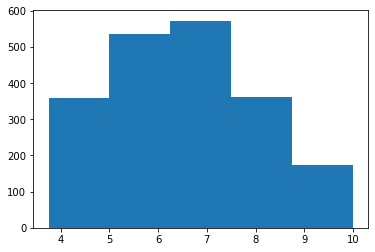

In [ ]:
plt.hist(lengua, bins=5)
plt.show() 

In [ ]:
suspensos=[]
suspensos2=[]
sobresalientes=[]
for i,pos in enumerate(lengua):
    if pos <5:
        if pos >= 4:
            suspensos.append(pos)
        else:
            suspensos2.append(pos)
    elif pos >8:
        sobresalientes.append(pos)
    
        
print(len(suspensos2))
print(len(sobresalientes))
print(len(suspensos2)/20+(len(suspensos)/20),"% de alumnos con notas menores a 5")
print(len(suspensos2)/20,"% de alumnos con notas menores a 4")
print(len(sobresalientes)/20,"% de alumnos con notas mayores a 8")



30
364
17.9 % de alumnos con notas menores a 5
1.5 % de alumnos con notas menores a 4
18.2 % de alumnos con notas mayores a 8


### construyendo mates bach ciencias

In [ ]:
import random
sobres=[9.25,9,9.15,9.50,9.75,10,9.60,9.10,9.07,9.05]
suspensos=[4.30,4.75,4.65,4.50,4.80,4.59,4.55,4.35,5]
import matplotlib.pyplot as plt
%matplotlib inline

mates=[]
for _ in range(2000):
    nota=abs(round((random.gauss(6.44,1.71)),2))
    if nota > 10.00:   
        mates.append(random.choices(sobres,weights=[1,1,1,1,1,1,1,1,1,1],k=1)[0])
    elif nota < 3.75:   
        mates.append(random.choices(suspensos,weights=[1,1,1,1,1,1,1,1,1],k=1)[0])
    else:
        mates.append(nota)

print(min(mates))
max(mates)

3.75


10.0

In [ ]:
def Average(lst):
    return sum(lst) / len(lst)
Average(mates)


6.464725000000005

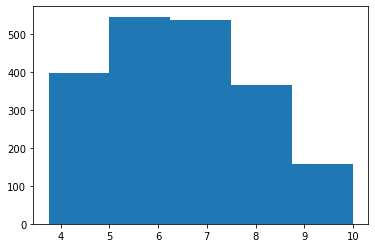

In [ ]:
plt.hist(mates, bins=5)
plt.show() 

In [ ]:
suspensos=[]
suspensos2=[]
sobresalientes=[]
for i,pos in enumerate(mates):
    if pos <5:
        if pos >= 4:
            suspensos.append(pos)
        else:
            suspensos2.append(pos)
    elif pos >8:
        sobresalientes.append(pos)
    
        
print(len(suspensos2))
print(len(sobresalientes))
print(len(suspensos2)/20+(len(suspensos)/20),"% de alumnos con notas menores a 5")
print(len(suspensos2)/20,"% de alumnos con notas menores a 4")
print(len(sobresalientes)/20,"% de alumnos con notas mayores a 8")



36
331
19.8 % de alumnos con notas menores a 5
1.8 % de alumnos con notas menores a 4
16.55 % de alumnos con notas mayores a 8


### construyendo ingles bach ciencias

In [ ]:
import random
sobres=[9.25,9,9.15,9.50,9.75,10,9.60,9.10,9.07,9.05]
suspensos=[4.30,4.75,4.65,4.50,4.80,4.59,4.55,4.35,5]
import matplotlib.pyplot as plt
%matplotlib inline

ingles=[]
for _ in range(2000):
    nota=abs(round((random.gauss(6.90,1.60)),2))
    if nota > 10.00:   
        ingles.append(random.choices(sobres,weights=[1,1,1,1,1,1,1,1,1,1],k=1)[0])
    elif nota < 3.75:   
        ingles.append(random.choices(suspensos,weights=[1,1,1,1,1,1,1,1,1],k=1)[0])
    else:
        ingles.append(nota)

print(min(ingles))
max(ingles)

3.75


10

In [ ]:
def Average(lst):
    return sum(lst) / len(lst)
Average(ingles)


6.9277749999999925

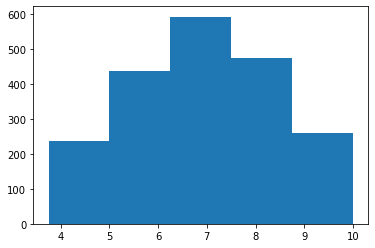

In [ ]:
plt.hist(ingles, bins=5)
plt.show() 

In [ ]:
suspensos=[]
suspensos2=[]
sobresalientes=[]
for i,pos in enumerate(ingles):
    if pos <5:
        if pos >= 4:
            suspensos.append(pos)
        else:
            suspensos2.append(pos)
    elif pos >8:
        sobresalientes.append(pos)
    
        
print(len(suspensos2))
print(len(sobresalientes))
print(len(suspensos2)/20+(len(suspensos)/20),"% de alumnos con notas menores a 5")
print(len(suspensos2)/20,"% de alumnos con notas menores a 4")
print(len(sobresalientes)/20,"% de alumnos con notas mayores a 8")



22
512
11.85 % de alumnos con notas menores a 5
1.1 % de alumnos con notas menores a 4
25.6 % de alumnos con notas mayores a 8


In [ ]:
dfh1=pd.read_csv("Building_data_students_v2.csv")

### construyendo Física bach ciencias

In [ ]:
import random
sobres=[9.25,9,9.15,9.50,9.75,10,9.60,9.10,9.07,9.05]
suspensos=[4.30,4.75,4.65,4.50,4.80,4.59,4.55,4.35,5]
import matplotlib.pyplot as plt
%matplotlib inline

fisica=[]
for _ in range(2000):
    nota=abs(round((random.gauss(6.19,1.65)),2))
    if nota > 10.00:   
        fisica.append(random.choices(sobres,weights=[1,1,1,1,1,1,1,1,1,1],k=1)[0])
    elif nota < 3.75:   
        fisica.append(random.choices(suspensos,weights=[1,1,1,1,1,1,1,1,1],k=1)[0])
    else:
        fisica.append(nota)

print(min(fisica))
max(fisica)

3.75


10

In [ ]:
def Average(lst):
    return sum(lst) / len(lst)
Average(fisica)


6.336530000000008

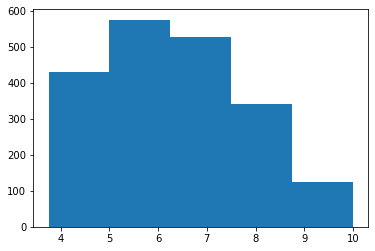

In [ ]:
plt.hist(fisica, bins=5)
plt.show() 

In [ ]:
suspensos=[]
suspensos2=[]
sobresalientes=[]
for i,pos in enumerate(fisica):
    if pos <5:
        if pos >= 4:
            suspensos.append(pos)
        else:
            suspensos2.append(pos)
    elif pos >=8:
        sobresalientes.append(pos)
    
        
print(len(suspensos2))
print(len(sobresalientes))
print(len(suspensos2)/20+(len(suspensos)/20),"% de alumnos con notas menores a 5")
print(len(suspensos2)/20,"% de alumnos con notas menores a 4")
print(len(sobresalientes)/20,"% de alumnos con notas mayores a 8")



47
294
21.55 % de alumnos con notas menores a 5
2.35 % de alumnos con notas menores a 4
14.7 % de alumnos con notas mayores a 8


### construyendo DibujoTecnico bach ciencias

In [ ]:
import random
sobres=[9.25,9,9.15,9.50,9.75,10,9.60,9.10,9.07,9.05]
suspensos=[4.30,4.75,4.65,4.50,4.80,4.59,4.55,5.35,5.05]
import matplotlib.pyplot as plt
%matplotlib inline

dibujo=[]
for _ in range(2000):
    nota=abs(round((random.gauss(6.49,1.85)),2))
    if nota > 10.00:   
        dibujo.append(random.choices(sobres,weights=[1,1,1,1,1,1,1,1,1,1],k=1)[0])
    elif nota < 3.75:   
        dibujo.append(random.choices(suspensos,weights=[1,1,1,1,1,1,1,1,1],k=1)[0])
    else:
        dibujo.append(nota)

print(min(dibujo))
max(dibujo)

3.76


10

In [ ]:
def Average(lst):
    return sum(lst) / len(lst)
Average(dibujo)


6.621659999999999

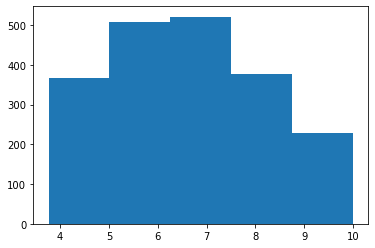

In [ ]:
plt.hist(dibujo, bins=5)
plt.show() 

In [ ]:
suspensos=[]
suspensos2=[]
sobresalientes=[]
for i,pos in enumerate(dibujo):
    if pos <5:
        if pos >= 4:
            suspensos.append(pos)
        else:
            suspensos2.append(pos)
    elif pos >8:
        sobresalientes.append(pos)
    
        
print(len(suspensos2))
print(len(sobresalientes))
print(len(suspensos2)/20+(len(suspensos)/20),"% de alumnos con notas menores a 5")
print(len(suspensos2)/20,"% de alumnos con notas menores a 4")
print(len(sobresalientes)/20,"% de alumnos con notas mayores a 8")



31
448
18.2 % de alumnos con notas menores a 5
1.55 % de alumnos con notas menores a 4
22.4 % de alumnos con notas mayores a 8


### construyendo Biologia bach ciencias

In [ ]:
import random
sobres=[9.25,9,9.15,9.50,9.75,10,9.60,9.10,9.07,9.05]
suspensos=[5.30,4.75,4.65,4.50,4.80,4.59,4.55,5.35,5]
import matplotlib.pyplot as plt
%matplotlib inline

bio=[]
for _ in range(2000):
    nota=abs(round((random.gauss(6.65,1.65)),2))
    if nota > 10.00:   
        bio.append(random.choices(sobres,weights=[1,1,1,1,1,1,1,1,1,1],k=1)[0])
    elif nota < 3.75:   
        bio.append(random.choices(suspensos,weights=[1,1,1,1,1,1,1,1,1],k=1)[0])
    else:
        bio.append(nota)

print(min(bio))
max(bio)

3.76


10

In [ ]:
def Average(lst):
    return sum(lst) / len(lst)
Average(bio)


6.66974499999999

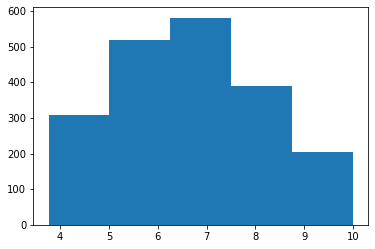

In [ ]:
plt.hist(bio, bins=5)
plt.show() 

In [ ]:
suspensos=[]
suspensos2=[]
sobresalientes=[]
for i,pos in enumerate(bio):
    if pos <5:
        if pos >= 4:
            suspensos.append(pos)
        else:
            suspensos2.append(pos)
    elif pos >8:
        sobresalientes.append(pos)
    
        
print(len(suspensos2))
print(len(sobresalientes))
print(len(suspensos2)/20+(len(suspensos)/20),"% de alumnos con notas menores a 5")
print(len(suspensos2)/20,"% de alumnos con notas menores a 4")
print(len(sobresalientes)/20,"% de alumnos con notas mayores a 8")



28
394
14.8 % de alumnos con notas menores a 5
1.4 % de alumnos con notas menores a 4
19.7 % de alumnos con notas mayores a 8


### construyendo quimica bach ciencias

In [ ]:
import random
sobres=[9.25,9,9.15,9.50,9.75,10,9.60,9.10,9.07,9.05]
suspensos=[5.30,4.75,4.65,4.55,4.80,4.59,4.85,5.35,5]
import matplotlib.pyplot as plt
%matplotlib inline

quimica=[]
for _ in range(2000):
    nota=abs(round((random.gauss(6.59,1.68)),2))
    if nota > 10.00:   
        quimica.append(random.choices(sobres,weights=[1,1,1,1,1,1,1,1,1,1],k=1)[0])
    elif nota < 3.75:   
        quimica.append(random.choices(suspensos,weights=[1,1,1,1,1,1,1,1,1],k=1)[0])
    else:
        quimica.append(nota)

print(min(quimica))
max(quimica)

3.76


10

In [ ]:
def Average(lst):
    return sum(lst) / len(lst)
Average(quimica)


6.62011500000001

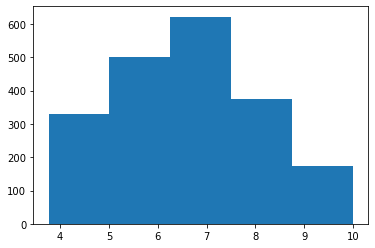

In [ ]:
plt.hist(quimica, bins=5)
plt.show() 

In [ ]:
suspensos=[]
suspensos2=[]
sobresalientes=[]
for i,pos in enumerate(quimica):
    if pos <5:
        if pos >= 4:
            suspensos.append(pos)
        else:
            suspensos2.append(pos)
    elif pos >8:
        sobresalientes.append(pos)
    
        
print(len(suspensos2))
print(len(sobresalientes))
print(len(suspensos2)/20+(len(suspensos)/20),"% de alumnos con notas menores a 5")
print(len(suspensos2)/20,"% de alumnos con notas menores a 4")
print(len(sobresalientes)/20,"% de alumnos con notas mayores a 8")



29
374
16.0 % de alumnos con notas menores a 5
1.45 % de alumnos con notas menores a 4
18.7 % de alumnos con notas mayores a 8


### construyendo Historia bach ciencias

In [ ]:
import random
sobres=[9.25,9,9.15,9.50,9.75,10,9.60,9.10,9.07,9.05]
suspensos=[5.10,4.75,4.65,4.50,4.80,4.59,4.55,5.35,5]
import matplotlib.pyplot as plt
%matplotlib inline

historia=[]
for _ in range(2000):
    nota=abs(round((random.gauss(6.51,1.66)),2))
    if nota > 10.00:   
        historia.append(random.choices(sobres,weights=[1,1,1,1,1,1,1,1,1,1],k=1)[0])
    elif nota < 3.75:   
        historia.append(random.choices(suspensos,weights=[1,1,1,1,1,1,1,1,1],k=1)[0])
    else:
        historia.append(nota)

print(min(historia))
max(historia)

3.75


10

In [ ]:
def Average(lst):
    return sum(lst) / len(lst)
Average(historia)


6.525795000000002

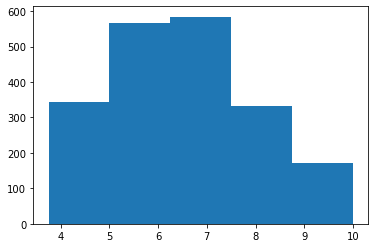

In [ ]:
plt.hist(historia, bins=5)
plt.show() 

In [ ]:
suspensos=[]
suspensos2=[]
sobresalientes=[]
for i,pos in enumerate(historia):
    if pos <5:
        if pos >= 4:
            suspensos.append(pos)
        else:
            suspensos2.append(pos)
    elif pos >8:
        sobresalientes.append(pos)
    
        
print(len(suspensos2))
print(len(sobresalientes))
print(len(suspensos2)/20+(len(suspensos)/20),"% de alumnos con notas menores a 5")
print(len(suspensos2)/20,"% de alumnos con notas menores a 4")
print(len(sobresalientes)/20,"% de alumnos con notas mayores a 8")



28
342
17.2 % de alumnos con notas menores a 5
1.4 % de alumnos con notas menores a 4
17.1 % de alumnos con notas mayores a 8


In [ ]:

df2["Lengua"]=lengua
df2["Mates"]=mates
df2["Ingles"]=ingles
df2["Biologia"]=bio
df2["Quimica"]=quimica
df2["Historia"]=historia
df2

,año,mes,dia,hora,min,dateInt,Date_start_horario,Date_start_Examenes,days_left,Lengua,Mates,Ingles,Biologia,Quimica,Historia
0,2021,5,20,9,0,20210520,2021-05-20 09:00:00,2021-06-07,17,7.65,4.91,4.08,6.83,6.18,6.68
1,2021,5,21,10,30,20210521,2021-05-21 10:30:00,2021-06-09,18,4.13,8.17,7.60,5.86,4.36,7.34
2,2021,5,15,9,45,20210515,2021-05-15 09:45:00,2021-06-11,26,5.68,9.22,6.04,5.28,5.11,6.71
3,2021,5,19,10,30,20210519,2021-05-19 10:30:00,2021-06-05,16,7.17,6.50,5.33,4.83,5.90,4.92
4,2021,5,14,9,0,20210514,2021-05-14 09:00:00,2021-06-05,21,7.26,7.28,5.82,6.25,7.21,7.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2021,5,17,10,30,20210517,2021-05-17 10:30:00,2021-06-04,17,5.15,6.90,4.34,7.25,6.90,4.95
1996,2021,5,17,10,30,20210517,2021-05-17 10:30:00,2021-06-01,14,4.35,7.24,4.25,4.06,7.76,5.06
1997,2021,5,14,10,30,20210514,2021-05-14 10:30:00,2021-06-07,23,8.38,5.78,6.75,5.97,6.39,9.24
1998,2021,5,15,11,30,20210515,2021-05-15 11:30:00,2021-06-09,24,4.44,4.30,5.89,6.93,6.59,7.78


In [ ]:
df2["days_left"].min()

10

In [ ]:
medias=[]
for i,pos in enumerate(df2.values.tolist()):
    media=round((pos[14]+pos[13]+pos[12]+pos[11]+pos[10]+pos[9])/6,2)
    medias.append(media)
df2["media_troncales"]=medias


In [ ]:
df2.sort_values(by=["media_troncales"],ascending=False)

,año,mes,dia,hora,min,dateInt,Date_start_horario,Date_start_Examenes,days_left,Lengua,Mates,Ingles,Biologia,Quimica,Historia,media_troncales
1404,2021,5,19,8,30,20210519,2021-05-19 08:30:00,2021-06-07,18,8.60,9.82,9.68,6.46,8.56,9.22,8.72
107,2021,5,16,8,30,20210516,2021-05-16 08:30:00,2021-06-07,21,7.95,6.19,9.65,9.07,8.94,8.59,8.40
391,2021,5,18,10,0,20210518,2021-05-18 10:00:00,2021-06-03,15,7.37,7.60,9.54,10.00,9.31,6.43,8.38
1962,2021,5,15,11,30,20210515,2021-05-15 11:30:00,2021-06-08,23,6.41,10.00,9.12,7.11,8.26,9.37,8.38
986,2021,5,15,11,0,20210515,2021-05-15 11:00:00,2021-06-08,23,9.75,8.24,7.97,9.07,7.75,7.26,8.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,2021,5,19,8,0,20210519,2021-05-19 08:00:00,2021-06-05,16,4.95,5.05,6.03,5.03,4.21,5.88,5.19
945,2021,5,18,11,30,20210518,2021-05-18 11:30:00,2021-06-08,20,4.86,4.30,4.94,5.17,6.68,5.07,5.17
1246,2021,5,14,12,30,20210514,2021-05-14 12:30:00,2021-06-07,23,5.15,4.70,5.26,4.22,4.85,6.85,5.17
578,2021,5,17,13,0,20210517,2021-05-17 13:00:00,2021-06-12,25,4.43,4.75,5.06,6.24,5.41,4.77,5.11


In [ ]:
for i,pos2 in enumerate(df1[["Lengua","Mates","Ingles","Fisica","Dibujo","Historia"]]):#resumen bach tecno
    suspensos=[]
    suspensos2=[]
    sobresalientes=[]
    for i,pos in enumerate(df1[pos2].values.tolist()):
        if pos <5:
            if pos >= 4:
                suspensos.append(pos)
            else:
                suspensos2.append(pos)
        elif pos >8:
            sobresalientes.append(pos)

    print(round(Average(df1[pos2].values.tolist()),2),"media de "+pos2)
    print(len(suspensos2),"alumnos con menos de un 4")
    print(len(suspensos2)/20+(len(suspensos)/20),"% de alumnos con notas menores a 5")
    print(len(suspensos2)/20,"% de alumnos con notas menores a 4")
    print(len(sobresalientes)/20,"% de alumnos con notas mayores a 8")
    print()

6.5 media de Lengua
27 alumnos con menos de un 4
17.55 % de alumnos con notas menores a 5
1.35 % de alumnos con notas menores a 4
17.45 % de alumnos con notas mayores a 8

6.57 media de Mates
31 alumnos con menos de un 4
17.25 % de alumnos con notas menores a 5
1.55 % de alumnos con notas menores a 4
19.5 % de alumnos con notas mayores a 8

6.94 media de Ingles
9 alumnos con menos de un 4
9.049999999999999 % de alumnos con notas menores a 5
0.45 % de alumnos con notas menores a 4
23.6 % de alumnos con notas mayores a 8

6.36 media de Fisica
32 alumnos con menos de un 4
18.650000000000002 % de alumnos con notas menores a 5
1.6 % de alumnos con notas menores a 4
14.5 % de alumnos con notas mayores a 8

6.64 media de Dibujo
22 alumnos con menos de un 4
15.35 % de alumnos con notas menores a 5
1.1 % de alumnos con notas menores a 4
22.4 % de alumnos con notas mayores a 8

6.54 media de Historia
22 alumnos con menos de un 4
15.15 % de alumnos con notas menores a 5
1.1 % de alumnos con notas

In [ ]:
for i,pos2 in enumerate(df2[["Lengua","Mates","Ingles","Biologia","Quimica","Historia"]]):#resumen bach sanit
    suspensos=[]
    suspensos2=[]
    sobresalientes=[]
    for i,pos in enumerate(df2[pos2].values.tolist()):
        if pos <5:
            if pos >= 4:
                suspensos.append(pos)
            else:
                suspensos2.append(pos)
        elif pos >8:
            sobresalientes.append(pos)

    print(round(Average(df2[pos2].values.tolist()),2),"media de "+pos2)
    print(len(suspensos2),"alumnos con menos de un 4")
    print(len(suspensos2)/20+(len(suspensos)/20),"% de alumnos con notas menores a 5")
    print(len(suspensos2)/20,"% de alumnos con notas menores a 4")
    print(len(sobresalientes)/20,"% de alumnos con notas mayores a 8")
    print()

6.56 media de Lengua
21 alumnos con menos de un 4
16.15 % de alumnos con notas menores a 5
1.05 % de alumnos con notas menores a 4
18.2 % de alumnos con notas mayores a 8

6.49 media de Mates
28 alumnos con menos de un 4
17.599999999999998 % de alumnos con notas menores a 5
1.4 % de alumnos con notas menores a 4
16.55 % de alumnos con notas mayores a 8

6.94 media de Ingles
17 alumnos con menos de un 4
10.25 % de alumnos con notas menores a 5
0.85 % de alumnos con notas menores a 4
25.6 % de alumnos con notas mayores a 8

6.69 media de Biologia
23 alumnos con menos de un 4
12.55 % de alumnos con notas menores a 5
1.15 % de alumnos con notas menores a 4
19.7 % de alumnos con notas mayores a 8

6.64 media de Quimica
21 alumnos con menos de un 4
13.600000000000001 % de alumnos con notas menores a 5
1.05 % de alumnos con notas menores a 4
18.7 % de alumnos con notas mayores a 8

6.6 media de Historia
24 alumnos con menos de un 4
15.299999999999999 % de alumnos con notas menores a 5
1.2 % d

In [ ]:
#### hacer esto despues de regular suspensos

In [ ]:
df_BACH_CIENCIAS=pd.concat([df1,df2])
df_BACH_CIENCIAS.sort_values(by=["media_troncales"],ascending=False)

,año,mes,dia,hora,min,dateInt,Date_start_horario,Date_start_Examenes,days_left,Lengua,Mates,Ingles,Dibujo,Fisica,Historia,media_troncales,Biologia,Quimica
1404,2021,5,19,8,30,20210519,2021-05-19 08:30:00,2021-06-07 00:00:00,18,8.60,9.82,9.68,NaN,NaN,9.22,8.72,6.46,8.56
470,2021,5,9,10,0,20210509,2021-05-09 10:00:00,2021-06-02,23,9.20,9.80,8.37,9.49,6.50,7.35,8.45,NaN,NaN
619,2021,5,16,12,0,20210516,2021-05-16 12:00:00,2021-06-08,22,5.76,7.67,9.49,9.89,9.10,8.75,8.44,NaN,NaN
293,2021,5,11,13,0,20210511,2021-05-11 13:00:00,2021-06-05,24,9.51,9.10,8.90,9.36,5.65,7.97,8.42,NaN,NaN
185,2021,5,17,12,30,20210517,2021-05-17 12:30:00,2021-06-02,15,9.21,9.55,8.19,8.62,6.62,8.20,8.40,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,2021,5,8,9,0,20210508,2021-05-08 09:00:00,2021-06-09,31,5.06,4.50,5.59,5.00,5.00,5.80,5.16,NaN,NaN
1295,2021,5,22,9,0,20210522,2021-05-22 09:00:00,2021-06-11,19,5.20,4.90,4.70,6.40,5.11,4.59,5.15,NaN,NaN
578,2021,5,17,13,0,20210517,2021-05-17 13:00:00,2021-06-12 00:00:00,25,4.43,4.75,5.06,NaN,NaN,4.77,5.11,6.24,5.41
384,2021,5,6,12,0,20210506,2021-05-06 12:00:00,2021-06-08,32,5.98,3.88,4.90,4.90,5.43,5.52,5.10,NaN,NaN


### regulando suspensos:

In [ ]:
random.randint(0, 2)

0

In [ ]:
suspensos=[5.10,4.75,4.15,4.50,4.80,4.59,4.55,5.35,5]

def checksus(lista):
    asignaturasHOYO=[]
    ises=[]
    for i in range(len(lista)):
        if lista[i]<4.71:#antes 4.7
            asignaturasHOYO.append(1)
            ises.append(i)
    return sum(asignaturasHOYO),ises
(checksus(suspensos)[1])


[2, 3, 5, 6]

In [ ]:
random.sample([2,3,6,8], 1)

[8]

In [ ]:
menosde5=[]
for i,pos in enumerate(df2[["Lengua","Mates","Ingles","Biologia","Quimica","Historia"]].values.tolist()):
    new_pos=pos
    if checksus(pos)[0]>=2:
        print(pos)
        menosde5.append(pos)
#alumnos con 2 o mas que tienen menos de 5
        
        



[4.22, 6.88, 4.7, 5.9, 8.15, 4.95]
[5.15, 4.7, 5.26, 4.22, 4.85, 6.85]
[7.07, 4.98, 3.94, 5.35, 5.76, 4.7]
[5.53, 6.55, 7.15, 4.19, 4.7, 4.76]
[9.53, 4.3, 7.16, 4.7, 4.75, 6.33]
[6.41, 7.73, 5.41, 9.2, 4.7, 4.55]
[4.7, 4.75, 7.57, 5.5, 4.65, 5.9]
[4.7, 6.72, 6.0, 7.34, 4.55, 5.0]
[4.7, 4.68, 7.05, 6.54, 7.11, 6.76]
[5.69, 5.29, 5.71, 6.09, 4.7, 4.42]


In [ ]:
print(len(menosde5)/20,"% de los alumnos tienen 2 o mas asignaturas con menos de un 4.72")

0.5 % de los alumnos tienen 2 o mas asignaturas con menos de un 4.72


In [ ]:
print(len(menosde5)/20,"% de los alumnos tienen 1 o mas asignaturas con menos de un 5")

64.5 % de los alumnos tienen 2 o mas asignaturas con menos de un 4.72


### arreglo no permitir mas de 2 notas seguidas menores a 4.7

In [ ]:
#suspensos=[5.05,4.95,5.10,5.00,4.90] estos para ==4 o menos
suspensos=[5.05,4.95,4.65,4.70]
new_values=[]
for i,pos in enumerate(df2[["Lengua","Mates","Ingles","Biologia","Quimica","Historia"]].values.tolist()):
    newpos=pos
    if checksus(pos)[0]==5:
        numbers=random.sample(checksus(pos)[1], 4)
        for i3 in numbers:
            newpos[i3]=random.choices(suspensos,weights=[1,1,1,1],k=1)[0]
        new_values.append(newpos)
    else:
        new_values.append(pos)
    
df2[["Lengua","Mates","Ingles","Biologia","Quimica","Historia"]]=new_values



In [ ]:
i1

In [ ]:
df_BACH_CIENCIAS.to_csv("df_BACH_CIENCIAS.csv",index=False)

In [ ]:
df1["media_troncales"].mean()

6.591584999999991